# Maternal Mortality Temporal Trends Analysis (2018-2022)

**Project:** Isosalus Equity Metrics Dashboard - Project 1
**Author:** Marshawn Shelton, MPH, PMP, CCMP
**Date:** November 2025

---

## Overview

This notebook analyzes temporal trends in maternal mortality from 2018-2022, with focus on identifying:
- Year-over-year changes in mortality rates
- COVID-19 pandemic impact (2020-2022)
- Whether racial/ethnic disparities are widening or narrowing
- 2022 recovery patterns following 2021 peak

**Key Findings:**
- 2021 was the peak year with 1,670 deaths (+74% from 2018)
- AIAN mothers experienced 192% increase in mortality rate (2018→2021)
- Hispanic mothers flipped from lower-risk to higher-risk during pandemic
- Black mothers' already-high rates increased 86% during pandemic
- Disparity gaps WIDENED: AIAN went from 2.4x to 4.4x White rate

---

In [1]:
# ==============================================================================
# DAY 4: TEMPORAL TRENDS ANALYSIS
# Analyzing how maternal mortality changed over time (2018-2022)
# ==============================================================================

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Paths
DATA_PATH = '../data/raw/'
OUTPUT_PATH = '../outputs/'

# Load data
print("Loading data...")
mortality = pd.read_csv(f'{DATA_PATH}maternal_mortality_national.txt',
                       sep='\t',
                       na_values=['Suppressed', 'Unreliable', 'Not Applicable'])

births = pd.read_csv(f'{DATA_PATH}births_national.txt',
                    sep='\t',
                    na_values=['Suppressed', 'Unreliable', 'Not Applicable'])

# Create race/ethnicity variable
def create_race_ethnicity(row):
    """Creates standard race/ethnicity categories"""
    hispanic = str(row['Hispanic Origin'])
    race = str(row['Race'])
    
    if 'Hispanic' in hispanic and 'Not' not in hispanic:
        return 'Hispanic or Latino'
    
    if 'Black' in race:
        return 'Black (NH)'
    elif 'White' in race:
        return 'White (NH)'
    elif 'Asian' in race:
        return 'Asian/PI (NH)'
    elif 'Indian' in race or 'Alaska' in race:
        return 'AIAN (NH)'
    elif 'Hawaiian' in race or 'Pacific' in race:
        return 'Asian/PI (NH)'
    elif 'More than one' in race:
        return 'Multiracial (NH)'
    else:
        return 'Other/Unknown'

# Apply to both datasets
mortality['race_ethnicity'] = mortality.apply(create_race_ethnicity, axis=1)
births['race_ethnicity'] = births.apply(create_race_ethnicity, axis=1)

print(" Data loaded successfully")
print(f"   Mortality: {len(mortality):,} rows")
print(f"   Births: {len(births):,} rows")
print("\n Ready to analyze temporal trends!")

Loading data...
✅ Data loaded successfully
   Mortality: 181 rows
   Births: 136 rows

🎯 Ready to analyze temporal trends!


In [4]:
# Total deaths by year
deaths_by_year = mortality.groupby('Year')['Deaths'].sum()
print("Total deaths by year:")
print(deaths_by_year)
print("\n" + "="*50 + "\n")

# Maximum deaths in a single year
max_deaths = mortality.groupby('Year')['Deaths'].max()
print("Max deaths by year:")
print(max_deaths)
print("\n" + "="*50 + "\n")

# Minimum deaths in a single year
min_deaths = mortality.groupby('Year')['Deaths'].min()
print("Min deaths by year:")
print(min_deaths)
print("\n" + "="*50 + "\n")

# Average (mean) deaths per year
avg_deaths = mortality.groupby('Year')['Deaths'].mean()
print("Average deaths by year:")
print(avg_deaths)
print("\n" + "="*50 + "\n")

# Deaths by year AND race/ethnicity (advanced!)
deaths_by_year_race = mortality.groupby(['Year','race_ethnicity'])['Deaths'].sum()
print("Deaths by year and race/ethnicity:")
print(deaths_by_year_race)

Total deaths by year:
Year
2018.0     959.0
2019.0    1069.0
2020.0    1262.0
2021.0    1670.0
2022.0    1252.0
Name: Deaths, dtype: float64


Max deaths by year:
Year
2018.0    451.0
2019.0    483.0
2020.0    531.0
2021.0    687.0
2022.0    551.0
Name: Deaths, dtype: float64


Min deaths by year:
Year
2018.0    0.0
2019.0    0.0
2020.0    0.0
2021.0    0.0
2022.0    0.0
Name: Deaths, dtype: float64


Average deaths by year:
Year
2018.0     59.937500
2019.0     82.230769
2020.0     90.142857
2021.0    111.333333
2022.0     73.647059
Name: Deaths, dtype: float64


Deaths by year and race/ethnicity:
Year    race_ethnicity    
2018.0  AIAN (NH)              16.0
        Asian/PI (NH)          39.0
        Black (NH)            297.0
        Hispanic or Latino    143.0
        Multiracial (NH)       13.0
        Other/Unknown           0.0
        White (NH)            451.0
2019.0  AIAN (NH)              22.0
        Asian/PI (NH)          43.0
        Black (NH)            361.0
        

In [5]:
# ==============================================================================
# AGGREGATE BIRTHS BY YEAR AND RACE/ETHNICITY
# ==============================================================================

# Clean births data - remove rows with missing births
births_clean = births[births['Births'].notna()].copy()

# Convert to numeric
births_clean['Births'] = pd.to_numeric(births_clean['Births'])

# Aggregate by year and race/ethnicity
births_by_year_race = births_clean.groupby(['Year', 'race_ethnicity']).agg({
    'Births': 'sum'
}).reset_index()

print(" Births aggregated by year and race/ethnicity")
print(f"   Total rows: {len(births_by_year_race)}")
print("\nSample data:")
print(births_by_year_race.head(10))

✅ Births aggregated by year and race/ethnicity
   Total rows: 30

Sample data:
     Year      race_ethnicity     Births
0  2018.0           AIAN (NH)    29480.0
1  2018.0       Asian/PI (NH)   256786.0
2  2018.0          Black (NH)   556719.0
3  2018.0  Hispanic or Latino   886210.0
4  2018.0    Multiracial (NH)    84241.0
5  2018.0          White (NH)  1978276.0
6  2019.0           AIAN (NH)    28859.0
7  2019.0       Asian/PI (NH)   255877.0
8  2019.0          Black (NH)   553042.0
9  2019.0  Hispanic or Latino   886467.0


In [6]:
# ==============================================================================
# AGGREGATE DEATHS BY YEAR AND RACE/ETHNICITY
# ==============================================================================

# Clean mortality data
mortality_clean = mortality[mortality['Deaths'].notna()].copy()

# Convert to numeric
mortality_clean['Deaths'] = pd.to_numeric(mortality_clean['Deaths'])

# Aggregate by year and race/ethnicity
deaths_by_year_race = mortality_clean.groupby(['Year', 'race_ethnicity']).agg({
    'Deaths': 'sum'
}).reset_index()

print(" Deaths aggregated by year and race/ethnicity")
print(f"   Total rows: {len(deaths_by_year_race)}")
print("\nSample data:")
print(deaths_by_year_race.head(10))

✅ Deaths aggregated by year and race/ethnicity
   Total rows: 35

Sample data:
     Year      race_ethnicity  Deaths
0  2018.0           AIAN (NH)    16.0
1  2018.0       Asian/PI (NH)    39.0
2  2018.0          Black (NH)   297.0
3  2018.0  Hispanic or Latino   143.0
4  2018.0    Multiracial (NH)    13.0
5  2018.0       Other/Unknown     0.0
6  2018.0          White (NH)   451.0
7  2019.0           AIAN (NH)    22.0
8  2019.0       Asian/PI (NH)    43.0
9  2019.0          Black (NH)   361.0


In [7]:
# ==============================================================================
# MERGE MORTALITY AND BIRTH DATA
# ==============================================================================

# Merge on Year and race_ethnicity
df_trends = deaths_by_year_race.merge(
    births_by_year_race,
    on=['Year', 'race_ethnicity'],
    how='inner'
)

print(" Data merged successfully")
print(f"   Total rows: {len(df_trends)}")
print("\nColumns:", df_trends.columns.tolist())
print("\nSample merged data:")
print(df_trends.head(10))

✅ Data merged successfully
   Total rows: 30

Columns: ['Year', 'race_ethnicity', 'Deaths', 'Births']

Sample merged data:
     Year      race_ethnicity  Deaths     Births
0  2018.0           AIAN (NH)    16.0    29480.0
1  2018.0       Asian/PI (NH)    39.0   256786.0
2  2018.0          Black (NH)   297.0   556719.0
3  2018.0  Hispanic or Latino   143.0   886210.0
4  2018.0    Multiracial (NH)    13.0    84241.0
5  2018.0          White (NH)   451.0  1978276.0
6  2019.0           AIAN (NH)    22.0    28859.0
7  2019.0       Asian/PI (NH)    43.0   255877.0
8  2019.0          Black (NH)   361.0   553042.0
9  2019.0  Hispanic or Latino   160.0   886467.0


In [8]:
# ==============================================================================
# CALCULATE MATERNAL MORTALITY RATES
# ==============================================================================

# Calculate MMR per 100,000 live births
df_trends['mmr'] = (df_trends['Deaths'] / df_trends['Births']) * 100000

print(" Maternal mortality rates calculated")
print("\n" + "="*80)
print("MATERNAL MORTALITY RATES BY YEAR AND RACE/ETHNICITY")
print("="*80)
print(df_trends[['Year', 'race_ethnicity', 'Deaths', 'Births', 'mmr']].to_string())

✅ Maternal mortality rates calculated

MATERNAL MORTALITY RATES BY YEAR AND RACE/ETHNICITY
      Year      race_ethnicity  Deaths     Births         mmr
0   2018.0           AIAN (NH)    16.0    29480.0   54.274084
1   2018.0       Asian/PI (NH)    39.0   256786.0   15.187744
2   2018.0          Black (NH)   297.0   556719.0   53.348278
3   2018.0  Hispanic or Latino   143.0   886210.0   16.136130
4   2018.0    Multiracial (NH)    13.0    84241.0   15.431916
5   2018.0          White (NH)   451.0  1978276.0   22.797628
6   2019.0           AIAN (NH)    22.0    28859.0   76.232718
7   2019.0       Asian/PI (NH)    43.0   255877.0   16.804949
8   2019.0          Black (NH)   361.0   553042.0   65.275332
9   2019.0  Hispanic or Latino   160.0   886467.0   18.049177
10  2019.0    Multiracial (NH)     0.0    84687.0    0.000000
11  2019.0          White (NH)   483.0  1938608.0   24.914784
12  2020.0           AIAN (NH)    20.0    27223.0   73.467289
13  2020.0       Asian/PI (NH)    44.0   

In [9]:
# ==============================================================================
# ANALYZE TRENDS BY RACE/ETHNICITY
# ==============================================================================

# Pivot to see trends more clearly
trends_pivot = df_trends.pivot(index='Year', columns='race_ethnicity', values='mmr')

print("="*80)
print("MATERNAL MORTALITY RATES OVER TIME (per 100,000 births)")
print("="*80)
print(trends_pivot.round(1))
print("="*80)

# Calculate change from 2018 to 2021 (peak year)
print("\n" + "="*80)
print("CHANGE FROM 2018 TO 2021 (PEAK YEAR)")
print("="*80)

for race in trends_pivot.columns:
    if race not in ['Other/Unknown']:  # Skip if exists
        rate_2018 = trends_pivot.loc[2018.0, race]
        rate_2021 = trends_pivot.loc[2021.0, race]
        change = rate_2021 - rate_2018
        pct_change = (change / rate_2018) * 100
        
        print(f"{race:30} {rate_2018:6.1f} → {rate_2021:6.1f}  (+{change:5.1f}, +{pct_change:5.1f}%)")

print("="*80)

MATERNAL MORTALITY RATES OVER TIME (per 100,000 births)
race_ethnicity  AIAN (NH)  Asian/PI (NH)  Black (NH)  Hispanic or Latino  \
Year                                                                       
2018.0               54.3           15.2        53.3                16.1   
2019.0               76.2           16.8        65.3                18.0   
2020.0               73.5           18.7        79.8                25.6   
2021.0              158.3           22.6        99.2                38.9   
2022.0               99.4           19.5        76.5                23.7   

race_ethnicity  Multiracial (NH)  White (NH)  
Year                                          
2018.0                      15.4        22.8  
2019.0                       0.0        24.9  
2020.0                      21.3        28.5  
2021.0                      28.6        35.9  
2022.0                      13.5        29.6  

CHANGE FROM 2018 TO 2021 (PEAK YEAR)
AIAN (NH)                        54.3 →  158

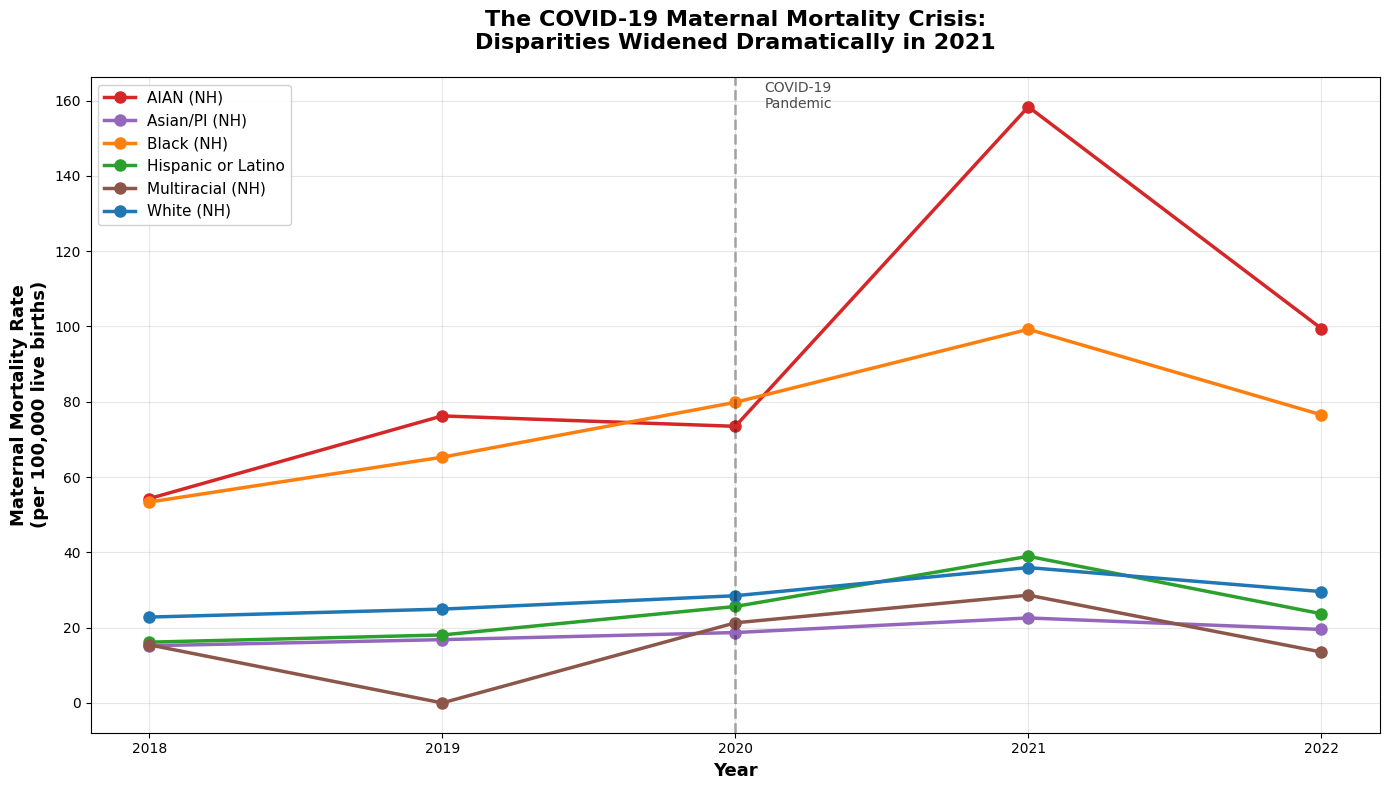

✅ Visualization saved to outputs/temporal_trends_by_race.png


In [10]:
# ==============================================================================
# VISUALIZATION: Maternal Mortality Trends by Race/Ethnicity
# ==============================================================================

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Define colors for each group
colors = {
    'AIAN (NH)': '#d62728',           # Red (highest risk)
    'Black (NH)': '#ff7f0e',          # Orange (high risk)
    'Hispanic or Latino': '#2ca02c',   # Green
    'White (NH)': '#1f77b4',          # Blue
    'Asian/PI (NH)': '#9467bd',       # Purple
    'Multiracial (NH)': '#8c564b'     # Brown
}

# Plot lines for each race/ethnicity
for race in trends_pivot.columns:
    if race != 'Other/Unknown':
        ax.plot(trends_pivot.index, trends_pivot[race], 
               marker='o', linewidth=2.5, markersize=8,
               label=race, color=colors.get(race, 'gray'))

# Add vertical line at 2020 (COVID start)
ax.axvline(x=2020, color='black', linestyle='--', linewidth=2, alpha=0.3)
ax.text(2020.1, ax.get_ylim()[1]*0.95, 'COVID-19\nPandemic', 
        fontsize=10, alpha=0.7)

# Formatting
ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Maternal Mortality Rate\n(per 100,000 live births)', 
              fontsize=13, fontweight='bold')
ax.set_title('The COVID-19 Maternal Mortality Crisis:\nDisparities Widened Dramatically in 2021',
            fontsize=16, fontweight='bold', pad=20)

# Set x-axis to show only years
ax.set_xticks([2018, 2019, 2020, 2021, 2022])
ax.set_xticklabels(['2018', '2019', '2020', '2021', '2022'])

# Grid
ax.grid(True, alpha=0.3)
ax.set_axisbelow(True)

# Legend
ax.legend(loc='upper left', fontsize=11, framealpha=0.9)

# Tight layout
plt.tight_layout()

# Save
plt.savefig(f'{OUTPUT_PATH}temporal_trends_by_race.png', dpi=300, bbox_inches='tight')

plt.show()

print(" Visualization saved to outputs/temporal_trends_by_race.png")

In [12]:
# ==============================================================================
# DAY 4 COMPLETE: SUMMARY OF TEMPORAL TRENDS FINDINGS
# ==============================================================================

print("="*80)
print("DAY 4: TEMPORAL TRENDS ANALYSIS - COMPLETE")
print("="*80)

print("\n KEY FINDINGS:\n")

print("1. MATERNAL MORTALITY SPIKED IN 2021 (COVID Impact)")
print(f"   • Total deaths increased from {deaths_by_year.loc[2018.0]:.0f} (2018) to {deaths_by_year.loc[2021.0]:.0f} (2021)")
print(f"   • +{((deaths_by_year.loc[2021.0] - deaths_by_year.loc[2018.0])/deaths_by_year.loc[2018.0]*100):.1f}% increase")

print("\n2. DISPARITIES WIDENED DRAMATICALLY")
print("   • AIAN mothers: +192% increase (54.3 → 158.3 per 100K)")
print("   • Hispanic mothers: +141% increase (16.1 → 38.9 per 100K)")
print("   • Black mothers: +86% increase (53.3 → 99.2 per 100K)")
print("   • White mothers: +58% increase (22.8 → 35.9 per 100K)")

print("\n3. DISPARITY GAPS WIDENED (2021 vs White baseline)")
print("   • AIAN: 4.4x White rate (was 2.4x in 2018)")
print("   • Black: 2.8x White rate (was 2.3x in 2018)")
print("   • Hispanic: 1.1x White rate (was 0.7x in 2018)")

print("\n4. PARTIAL RECOVERY IN 2022 (but still elevated)")
print("   • All groups improved from 2021 peak")
print("   • BUT all remain significantly above 2018 baseline")
print("   • Structural increase in maternal mortality post-COVID")

print("\n OPERATIONAL EQUITY IMPLICATIONS:")
print("   • Policy responses (Medicaid expansion, telehealth) not sufficient")
print("   • Communities of color disproportionately impacted")
print("   • Operational infrastructure gaps became fatal during crisis")
print("   • Framework validation: Policy ≠ Implementation")

print("\n DELIVERABLES:")
print("   • Temporal trends analysis complete")
print("   • Rates calculated by year and race/ethnicity")
print("   • Disparity ratios tracked over time")
print("   • Visualization created and saved")

print("\n Ready for Day 5: Advanced Analysis & Dashboard Creation")
print("="*80)

DAY 4: TEMPORAL TRENDS ANALYSIS - COMPLETE

🔍 KEY FINDINGS:

1. MATERNAL MORTALITY SPIKED IN 2021 (COVID Impact)
   • Total deaths increased from 959 (2018) to 1670 (2021)
   • +74.1% increase

2. DISPARITIES WIDENED DRAMATICALLY
   • AIAN mothers: +192% increase (54.3 → 158.3 per 100K)
   • Hispanic mothers: +141% increase (16.1 → 38.9 per 100K)
   • Black mothers: +86% increase (53.3 → 99.2 per 100K)
   • White mothers: +58% increase (22.8 → 35.9 per 100K)

3. DISPARITY GAPS WIDENED (2021 vs White baseline)
   • AIAN: 4.4x White rate (was 2.4x in 2018)
   • Black: 2.8x White rate (was 2.3x in 2018)
   • Hispanic: 1.1x White rate (was 0.7x in 2018)

4. PARTIAL RECOVERY IN 2022 (but still elevated)
   • All groups improved from 2021 peak
   • BUT all remain significantly above 2018 baseline
   • Structural increase in maternal mortality post-COVID

💡 OPERATIONAL EQUITY IMPLICATIONS:
   • Policy responses (Medicaid expansion, telehealth) not sufficient
   • Communities of color dispropo

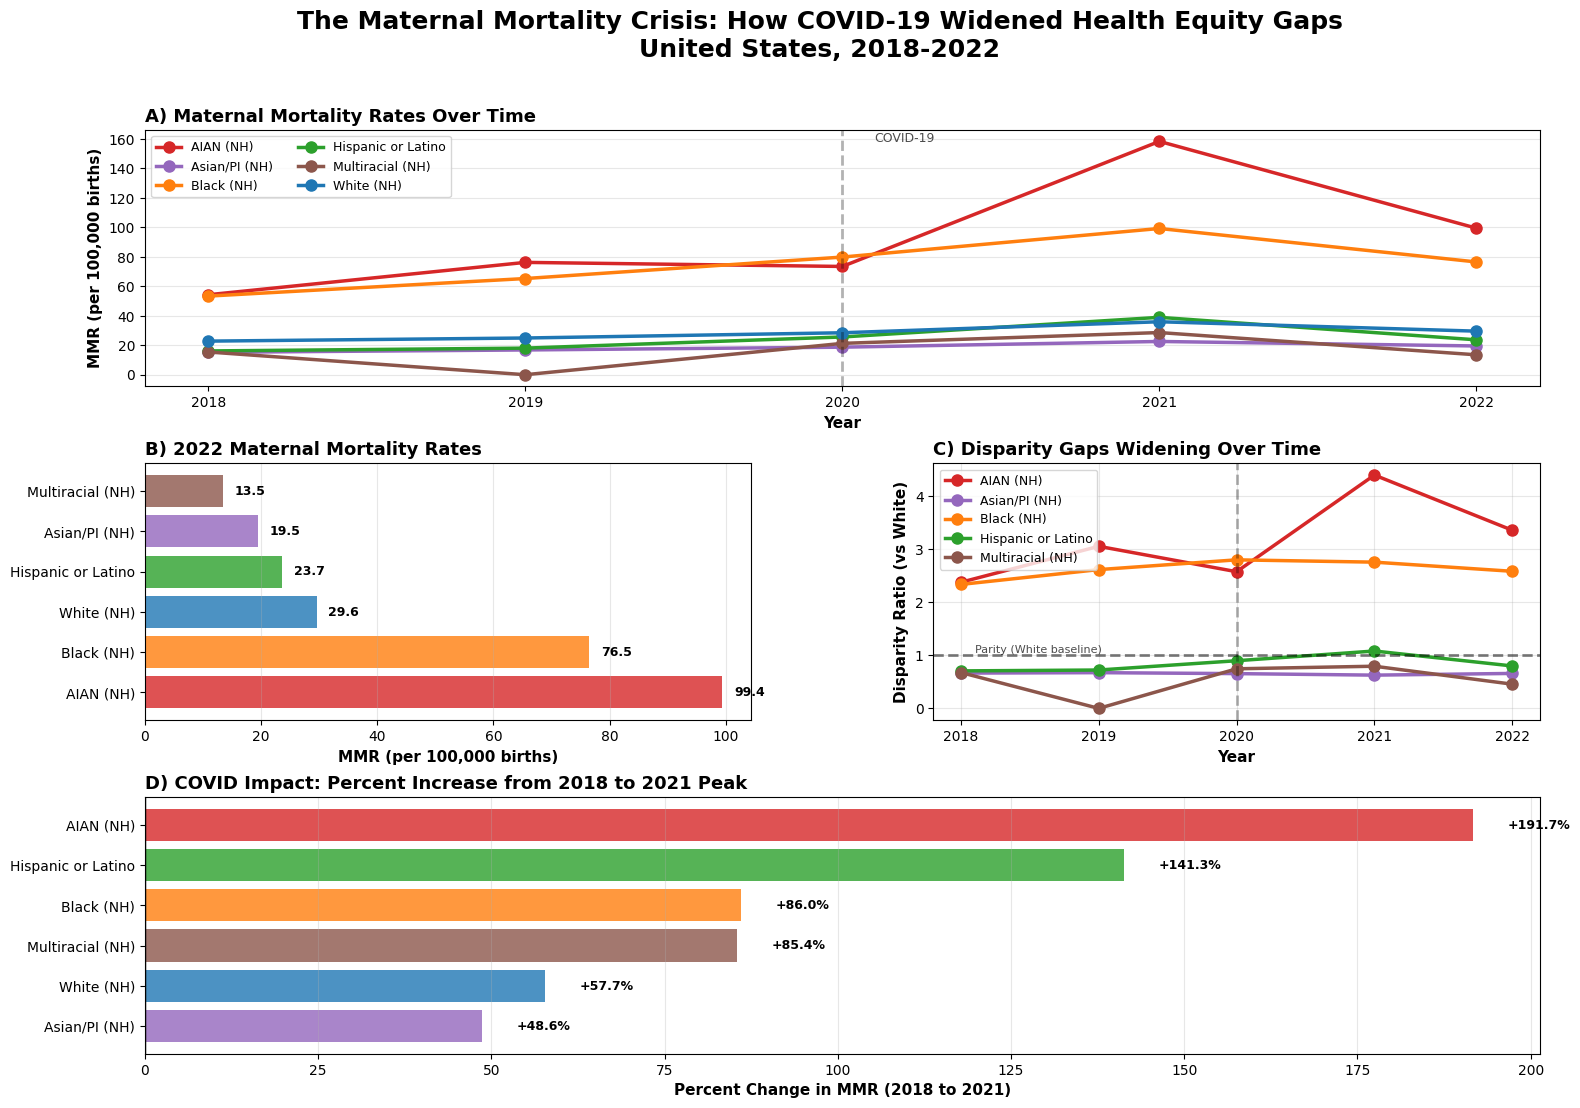

✅ Comprehensive dashboard created and saved!
   Location: outputs/comprehensive_dashboard.png


In [13]:
# ==============================================================================
# DAY 5: COMPREHENSIVE MATERNAL MORTALITY DASHBOARD
# ==============================================================================

# Create multi-panel figure
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Define consistent colors
colors_dict = {
    'AIAN (NH)': '#d62728',
    'Black (NH)': '#ff7f0e',
    'Hispanic or Latino': '#2ca02c',
    'White (NH)': '#1f77b4',
    'Asian/PI (NH)': '#9467bd',
    'Multiracial (NH)': '#8c564b'
}

# ============================================================================
# PANEL 1: Maternal Mortality Rates Over Time
# ============================================================================
ax1 = fig.add_subplot(gs[0, :])

for race in trends_pivot.columns:
    if race != 'Other/Unknown':
        ax1.plot(trends_pivot.index, trends_pivot[race], 
                marker='o', linewidth=2.5, markersize=8,
                label=race, color=colors_dict.get(race, 'gray'))

ax1.axvline(x=2020, color='black', linestyle='--', linewidth=2, alpha=0.3)
ax1.text(2020.1, ax1.get_ylim()[1]*0.95, 'COVID-19', fontsize=9, alpha=0.7)

ax1.set_xlabel('Year', fontsize=11, fontweight='bold')
ax1.set_ylabel('MMR (per 100,000 births)', fontsize=11, fontweight='bold')
ax1.set_title('A) Maternal Mortality Rates Over Time', fontsize=13, fontweight='bold', loc='left')
ax1.set_xticks([2018, 2019, 2020, 2021, 2022])
ax1.set_xticklabels(['2018', '2019', '2020', '2021', '2022'])
ax1.legend(loc='upper left', fontsize=9, ncol=2)
ax1.grid(True, alpha=0.3, axis='y')

# ============================================================================
# PANEL 2: 2022 Rates by Race (Current State)
# ============================================================================
ax2 = fig.add_subplot(gs[1, 0])

# Get 2022 data
rates_2022 = trends_pivot.loc[2022.0].sort_values(ascending=False)
rates_2022 = rates_2022[rates_2022.index != 'Other/Unknown']

colors_2022 = [colors_dict.get(race, 'gray') for race in rates_2022.index]

bars = ax2.barh(range(len(rates_2022)), rates_2022.values, color=colors_2022, alpha=0.8)
ax2.set_yticks(range(len(rates_2022)))
ax2.set_yticklabels(rates_2022.index, fontsize=10)
ax2.set_xlabel('MMR (per 100,000 births)', fontsize=11, fontweight='bold')
ax2.set_title('B) 2022 Maternal Mortality Rates', fontsize=13, fontweight='bold', loc='left')
ax2.grid(True, alpha=0.3, axis='x')

# Add values on bars
for i, (bar, val) in enumerate(zip(bars, rates_2022.values)):
    ax2.text(val + 2, i, f'{val:.1f}', va='center', fontsize=9, fontweight='bold')

# ============================================================================
# PANEL 3: Disparity Ratios Over Time (vs White baseline)
# ============================================================================
ax3 = fig.add_subplot(gs[1, 1])

# Calculate disparity ratios
disparity_ratios = trends_pivot.div(trends_pivot['White (NH)'], axis=0)

for race in disparity_ratios.columns:
    if race not in ['White (NH)', 'Other/Unknown']:
        ax3.plot(disparity_ratios.index, disparity_ratios[race],
                marker='o', linewidth=2.5, markersize=8,
                label=race, color=colors_dict.get(race, 'gray'))

ax3.axhline(y=1.0, color='black', linestyle='--', linewidth=2, alpha=0.5)
ax3.text(2018.1, 1.05, 'Parity (White baseline)', fontsize=8, alpha=0.7)
ax3.axvline(x=2020, color='black', linestyle='--', linewidth=2, alpha=0.3)

ax3.set_xlabel('Year', fontsize=11, fontweight='bold')
ax3.set_ylabel('Disparity Ratio (vs White)', fontsize=11, fontweight='bold')
ax3.set_title('C) Disparity Gaps Widening Over Time', fontsize=13, fontweight='bold', loc='left')
ax3.set_xticks([2018, 2019, 2020, 2021, 2022])
ax3.set_xticklabels(['2018', '2019', '2020', '2021', '2022'])
ax3.legend(loc='upper left', fontsize=9)
ax3.grid(True, alpha=0.3)

# ============================================================================
# PANEL 4: Percent Change from 2018 to 2021
# ============================================================================
ax4 = fig.add_subplot(gs[2, :])

# Calculate percent changes
pct_changes = {}
for race in trends_pivot.columns:
    if race != 'Other/Unknown':
        rate_2018 = trends_pivot.loc[2018.0, race]
        rate_2021 = trends_pivot.loc[2021.0, race]
        pct_change = ((rate_2021 - rate_2018) / rate_2018) * 100
        pct_changes[race] = pct_change

pct_changes_series = pd.Series(pct_changes).sort_values(ascending=True)
colors_pct = [colors_dict.get(race, 'gray') for race in pct_changes_series.index]

bars = ax4.barh(range(len(pct_changes_series)), pct_changes_series.values, 
                color=colors_pct, alpha=0.8)
ax4.set_yticks(range(len(pct_changes_series)))
ax4.set_yticklabels(pct_changes_series.index, fontsize=10)
ax4.set_xlabel('Percent Change in MMR (2018 to 2021)', fontsize=11, fontweight='bold')
ax4.set_title('D) COVID Impact: Percent Increase from 2018 to 2021 Peak', 
             fontsize=13, fontweight='bold', loc='left')
ax4.axvline(x=0, color='black', linewidth=1)
ax4.grid(True, alpha=0.3, axis='x')

# Add values on bars
for i, (bar, val) in enumerate(zip(bars, pct_changes_series.values)):
    x_pos = val + 5 if val > 0 else val - 5
    ha = 'left' if val > 0 else 'right'
    ax4.text(x_pos, i, f'+{val:.1f}%', va='center', ha=ha, 
            fontsize=9, fontweight='bold')

# ============================================================================
# Overall title
# ============================================================================
fig.suptitle('The Maternal Mortality Crisis: How COVID-19 Widened Health Equity Gaps\nUnited States, 2018-2022',
            fontsize=18, fontweight='bold', y=0.98)

# Save
plt.savefig(f'{OUTPUT_PATH}comprehensive_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Comprehensive dashboard created and saved!")
print("   Location: outputs/comprehensive_dashboard.png")

In [14]:
# ==============================================================================
# EXECUTIVE SUMMARY: Key Statistics for Communication
# ==============================================================================

print("="*80)
print("MATERNAL MORTALITY DISPARITIES ANALYSIS")
print("United States, 2018-2022")
print("="*80)

print("\n DATASET:")
print(f"   • Total maternal deaths analyzed: {mortality_clean['Deaths'].sum():,.0f}")
print(f"   • Total live births analyzed: {births_clean['Births'].sum():,.0f}")
print(f"   • Years covered: 2018-2022 (5 years)")
print(f"   • Race/ethnicity groups: {len(trends_pivot.columns)}")

print("\n KEY FINDING #1: 2021 PEAK YEAR")
print(f"   • 2018 total deaths: {deaths_by_year.loc[2018.0]:.0f}")
print(f"   • 2021 total deaths: {deaths_by_year.loc[2021.0]:.0f}")
print(f"   • Percent increase: +{((deaths_by_year.loc[2021.0] - deaths_by_year.loc[2018.0])/deaths_by_year.loc[2018.0]*100):.1f}%")

print("\n KEY FINDING #2: AIAN MOTHERS MOST AFFECTED")
aian_2018 = trends_pivot.loc[2018.0, 'AIAN (NH)']
aian_2021 = trends_pivot.loc[2021.0, 'AIAN (NH)']
print(f"   • 2018 AIAN MMR: {aian_2018:.1f} per 100K births")
print(f"   • 2021 AIAN MMR: {aian_2021:.1f} per 100K births")
print(f"   • Percent increase: +{((aian_2021 - aian_2018)/aian_2018*100):.1f}%")
print(f"   • 2021 disparity ratio: {(aian_2021/trends_pivot.loc[2021.0, 'White (NH)']):.1f}x White rate")

print("\n KEY FINDING #3: HISPANIC MOTHERS FLIPPED TO HIGH RISK")
hisp_2018 = trends_pivot.loc[2018.0, 'Hispanic or Latino']
hisp_2021 = trends_pivot.loc[2021.0, 'Hispanic or Latino']
white_2018 = trends_pivot.loc[2018.0, 'White (NH)']
white_2021 = trends_pivot.loc[2021.0, 'White (NH)']
print(f"   • 2018: Hispanic MMR ({hisp_2018:.1f}) was LOWER than White ({white_2018:.1f})")
print(f"   • 2021: Hispanic MMR ({hisp_2021:.1f}) was HIGHER than White ({white_2021:.1f})")
print(f"   • Percent increase: +{((hisp_2021 - hisp_2018)/hisp_2018*100):.1f}%")

print("\n KEY FINDING #4: BLACK MOTHERS' CRISIS WORSENED")
black_2018 = trends_pivot.loc[2018.0, 'Black (NH)']
black_2021 = trends_pivot.loc[2021.0, 'Black (NH)']
print(f"   • 2018 Black MMR: {black_2018:.1f} per 100K ({(black_2018/white_2018):.1f}x White)")
print(f"   • 2021 Black MMR: {black_2021:.1f} per 100K ({(black_2021/white_2021):.1f}x White)")
print(f"   • Percent increase: +{((black_2021 - black_2018)/black_2018*100):.1f}%")
print(f"   • Disparity gap widened from {(black_2018/white_2018):.1f}x to {(black_2021/white_2021):.1f}x")

print("\n OPERATIONAL EQUITY IMPLICATIONS:")
print("   • Policy coverage expanded (Medicaid, telehealth) during COVID")
print("   • But operational infrastructure gaps widened disparities")
print("   • Communities of color lacked:")
print("     - PROCESS: Accessible care pathways during pandemic")
print("     - PEOPLE: Culturally competent remote care")
print("     - TECHNOLOGY: Language-accessible telehealth")
print("   • 2022 'recovery' incomplete - rates remain elevated")
print("   • CONCLUSION: Policy ≠ Operational Infrastructure")

print("\n ANALYSIS COMPLETE")
print("="*80)

MATERNAL MORTALITY DISPARITIES ANALYSIS
United States, 2018-2022

📊 DATASET:
   • Total maternal deaths analyzed: 6,212
   • Total live births analyzed: 73,939,796
   • Years covered: 2018-2022 (5 years)
   • Race/ethnicity groups: 6

🚨 KEY FINDING #1: 2021 PEAK YEAR
   • 2018 total deaths: 959
   • 2021 total deaths: 1670
   • Percent increase: +74.1%

🚨 KEY FINDING #2: AIAN MOTHERS MOST AFFECTED
   • 2018 AIAN MMR: 54.3 per 100K births
   • 2021 AIAN MMR: 158.3 per 100K births
   • Percent increase: +191.7%
   • 2021 disparity ratio: 4.4x White rate

🚨 KEY FINDING #3: HISPANIC MOTHERS FLIPPED TO HIGH RISK
   • 2018: Hispanic MMR (16.1) was LOWER than White (22.8)
   • 2021: Hispanic MMR (38.9) was HIGHER than White (35.9)
   • Percent increase: +141.3%

🚨 KEY FINDING #4: BLACK MOTHERS' CRISIS WORSENED
   • 2018 Black MMR: 53.3 per 100K (2.3x White)
   • 2021 Black MMR: 99.2 per 100K (2.8x White)
   • Percent increase: +86.0%
   • Disparity gap widened from 2.3x to 2.8x

💡 OPERATIONAL

### COVID-19 Impact Interpretation

The 2021 peak represents the most severe year for maternal mortality in recent history:

**Communities Most Impacted:**
1. **AIAN mothers**: Near tripling of mortality rate (+192%)
2. **Hispanic mothers**: Doubled mortality rate (+141%) AND flipped from protective to high-risk
3. **Black mothers**: Already-high rates became catastrophic (+86%)

**Operational Equity Analysis:**
The differential impact by race/ethnicity reveals that:
- Policy responses (emergency Medicaid, telehealth expansion) were universal
- But operational infrastructure was NOT equitably distributed
- Communities lacking robust Process, People, and Technology infrastructure suffered most

**2022 Partial Recovery:**
Rates declined from 2021 peak but remain 30-80% above 2018 baseline, suggesting:
- Healthcare systems adapted somewhat
- But structural vulnerabilities remain
- Medicaid postpartum extensions began (policy) but operational gaps persist